
<div class="text_cell_render border-box-sizing rendered_html">
<div style="color:black; border: 2px solid #6f42c1; background-color:#f3e8ff; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">🔥 DeNoising AutoEncoder || Generative-AI🔥</div>
</div>


![](https://media.licdn.com/dms/image/C4D12AQGXZeyMTcXDXw/article-inline_image-shrink_1500_2232/0/1618927594255?e=1724889600&v=beta&t=lPJsTIheFsLhVzUUpnc0t2rKzUrtLsriVaj9Q5TX3ao)

### Denoising Autoencoders

A denoising autoencoder (DAE) is a type of artificial neural network designed to remove noise from data, typically images. The main goal of a DAE is to learn a representation (encoding) for a set of data, usually for the purpose of removing noise. It consists of two main components: the encoder and the decoder.

#### Key Concepts

1. **Autoencoder Structure:**
   - **Encoder:** Compresses the input data into a lower-dimensional representation.
   - **Decoder:** Reconstructs the original data from the lower-dimensional representation.
   
2. **Denoising Objective:**
   - Unlike traditional autoencoders, which aim to reconstruct the input from the encoded representation, denoising autoencoders are trained to reconstruct the original, noise-free input from a noisy version of it.

3. **Training Process:**
   - **Input and Target:** During training, the input to the DAE is the noisy version of the data, and the target output is the clean version.
   - **Loss Function:** The reconstruction error (e.g., mean squared error) between the denoised output and the original clean data is minimized.

4. **Noise Injection:**
   - **Adding Noise:** Noise is intentionally added to the input data during training. This noise can be Gaussian noise, salt-and-pepper noise, or any other type of corruption.
   - **Purpose of Noise:** The added noise forces the autoencoder to learn robust features that capture the essential structure of the data, making it more effective at noise removal.

5. **Applications:**
   - **Image Denoising:** DAEs are commonly used to remove noise from images, improving their quality.
   - **Preprocessing:** DAEs can be used as a preprocessing step to enhance the quality of data before using it for other tasks, such as classification or segmentation.
   - **Feature Learning:** By learning robust representations, DAEs can also be used for feature extraction, improving the performance of downstream machine learning tasks.

6. **Advantages:**
   - **Noise Robustness:** DAEs improve the model's robustness to noisy inputs, making them more reliable in real-world applications where data is often imperfect.
   - **Generalization:** By learning to denoise, DAEs can capture more general and meaningful features of the data, improving generalization to unseen data.

7. **Challenges:**
   - **Noise Type:** The performance of a DAE can be sensitive to the type and amount of noise. The model needs to be trained with noise that closely resembles the noise encountered in real applications.
   - **Overfitting:** DAEs, like other neural networks, can overfit the training data. Techniques such as dropout, regularization, and proper noise levels are used to mitigate overfitting.

### Summary

Denoising autoencoders are powerful neural networks used to remove noise from data by learning robust and meaningful representations. They consist of an encoder that compresses the data and a decoder that reconstructs the original data from the compressed representation. DAEs are trained using noisy data as input and clean data as the target, which enhances their ability to handle noisy real-world data and improves generalization.


<div class="text_cell_render border-box-sizing rendered_html">
<div style="color:black; border: 2px solid #6f42c1; background-color:#f3e8ff; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">📚 Importing Libraries 📚</div>
</div>


In [1]:
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.optimizers import Adam

2024-07-04 16:21:48.058135: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-04 16:21:48.058237: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-04 16:21:48.155625: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered



<div class="text_cell_render border-box-sizing rendered_html">
<div style="color:black; border: 2px solid #6f42c1; background-color:#f3e8ff; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">🧾Loading Dataset🧾</div>
</div>


In [2]:
(x_train,_),(x_test,_) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step



<div class="text_cell_render border-box-sizing rendered_html">
<div style="color:black; border: 2px solid #6f42c1; background-color:#f3e8ff; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">🛠 Normalization 🛠</div>
</div>


In [3]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32')/255.0 

In [4]:
x_train = np.expand_dims(x_train,axis = -1)
x_test = np.expand_dims(x_test, axis = -1)


<div class="text_cell_render border-box-sizing rendered_html">
<div style="color:black; border: 2px solid #6f42c1; background-color:#f3e8ff; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">😑Adding Noise😑</div>
</div>


In [5]:
def add_noise(images, noise_factor):
    noisy_images = images + noise_factor * np.random.normal(loc = 0.0, scale = 1.0,size = images.shape)
    noisy_images = np.clip(noisy_images, 0.,1.)
    return noisy_images

### Function Purpose
The purpose of this function is to add Gaussian noise to a set of images. This noise simulates real-world noise that might be present in images (e.g., due to poor lighting or other environmental factors). The added noise helps in training the denoising autoencoder to learn how to remove such noise from images.

### Explanation of Each Line

1. **Function Definition:**
   ```python
   def add_noise(images, noise_factor):
   ```
   - **`images`**: The input images to which we want to add noise.
   - **`noise_factor`**: A scalar that controls the amount of noise added to the images. Higher values mean more noise.

2. **Adding Noise:**
   ```python
   noisy_images = images + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=images.shape)
   ```
   - **`np.random.normal(loc=0.0, scale=1.0, size=images.shape)`**: This generates a NumPy array of the same shape as `images`, with random values drawn from a Gaussian (normal) distribution with a mean (`loc`) of 0.0 and a standard deviation (`scale`) of 1.0.
   - **`noise_factor * np.random.normal(...)`**: The generated noise values are scaled by `noise_factor`, controlling the intensity of the noise.
   - **`images + noise_factor * ...`**: The scaled noise values are added to the original images, creating noisy images.

3. **Clipping Values:**
   ```python
   noisy_images = np.clip(noisy_images, 0., 1.)
   ```
   - This ensures that all pixel values in `noisy_images` stay within the valid range [0, 1]. Pixel values outside this range are clipped (i.e., set to the nearest boundary value, 0 or 1).
   - **`np.clip(noisy_images, 0., 1.)`**: This function takes three arguments: the array to be clipped, the minimum value, and the maximum value. In this case, it ensures that all pixel values in `noisy_images` remain between 0 and 1.

4. **Return Noisy Images:**
   ```python
   return noisy_images
   ```
   - This returns the noisy images generated by the function.

### Example
If `images` is an array of shape (10000, 28, 28, 1) (for 10,000 MNIST images) and `noise_factor` is set to 0.5, the function will:
1. Generate an array of random values of shape (10000, 28, 28, 1) from a normal distribution with mean 0 and standard deviation 1.
2. Multiply these random values by 0.5, scaling the noise.
3. Add the scaled noise to the original images.
4. Ensure the resulting pixel values are within the range [0, 1].

The output is a set of noisy images that can be used to train the denoising autoencoder.

In [6]:
noise_factor = 0.5
x_train_noisy = add_noise(x_train, noise_factor)
x_test_noisy = add_noise(x_test, noise_factor)


<div class="text_cell_render border-box-sizing rendered_html">
<div style="color:black; border: 2px solid #6f42c1; background-color:#f3e8ff; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">🔥 DeNoising AutoEncoder Model 🔥</div>
</div>


In [7]:
input_img = Input(shape = (28,28,1))

In [8]:
# Encoder
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

### Encoder

The encoder part of the autoencoder compresses the input image into a lower-dimensional representation, often called the latent space or code. Here's how it works step by step:

1. **First Convolutional Layer:**
   ```python
   x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
   ```
   - **`Conv2D(32, (3, 3), activation='relu', padding='same')`**: This layer applies 32 filters of size 3x3 to the input image, with ReLU activation. The `padding='same'` ensures the output has the same spatial dimensions as the input by padding the input with zeros.
   - **`input_img`**: The input image tensor with shape (28, 28, 1).

2. **First Max Pooling Layer:**
   ```python
   x = MaxPooling2D((2, 2), padding='same')(x)
   ```
   - **`MaxPooling2D((2, 2), padding='same')`**: This layer downsamples the input by taking the maximum value over 2x2 regions. `padding='same'` ensures the output has the same spatial dimensions as the input after padding.

3. **Second Convolutional Layer:**
   ```python
   x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
   ```
   - Similar to the first convolutional layer, this layer applies 32 filters of size 3x3 to the input from the previous layer, with ReLU activation and `padding='same'`.

4. **Second Max Pooling Layer:**
   ```python
   x = MaxPooling2D((2, 2), padding='same')(x)
   ```
   - This layer again downsamples the input by taking the maximum value over 2x2 regions, with `padding='same'`.

### Decoder

The decoder part of the autoencoder reconstructs the image from the lower-dimensional representation created by the encoder. Here's how it works step by step:

1. **First Convolutional Layer:**
   ```python
   x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
   ```
   - This layer applies 32 filters of size 3x3 to the encoded input, with ReLU activation and `padding='same'`.

2. **First Up Sampling Layer:**
   ```python
   x = UpSampling2D((2, 2))(x)
   ```
   - **`UpSampling2D((2, 2))`**: This layer upsamples the input by repeating the rows and columns of the data, effectively doubling the spatial dimensions.

3. **Second Convolutional Layer:**
   ```python
   x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
   ```
   - Similar to the previous convolutional layer, this layer applies 32 filters of size 3x3 to the input, with ReLU activation and `padding='same'`.

4. **Second Up Sampling Layer:**
   ```python
   x = UpSampling2D((2, 2))(x)
   ```
   - This layer again upsamples the input, doubling the spatial dimensions.

5. **Final Convolutional Layer:**
   ```python
   decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
   ```
   - **`Conv2D(1, (3, 3), activation='sigmoid', padding='same')`**: This final layer applies 1 filter of size 3x3 to the input, with sigmoid activation and `padding='same'`. The sigmoid activation function outputs values in the range [0, 1], which is suitable for the normalized pixel values.

### Summary
- **Encoder**: The encoder compresses the input image by applying convolutional layers to extract features and max pooling layers to reduce the spatial dimensions.
- **Decoder**: The decoder reconstructs the compressed representation back to the original image dimensions by applying convolutional layers and upsampling layers to increase the spatial dimensions.

By training this autoencoder, the model learns to effectively remove noise from the images by learning the mapping from noisy images to their clean versions.

In [9]:
# Autoencoder model
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer=Adam(),metrics = ['accuracy'], loss='binary_crossentropy')

<div class="text_cell_render border-box-sizing rendered_html">
  <div style="color:black; border: 2px solid #ff6347; background-color:#ff6347; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Arial', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); box-shadow: 0 4px 8px rgba(0, 0, 0, 0.4);">
   ✔ Model Summary ✔
  </div>
</div>

In [10]:
autoencoder.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 28, 28, 1)      │           289 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,353 (110.75 KB)

 Trainable params: 28,353 (110.75 KB)

 Non-trainable params: 0 (0.00 B)

<div class="text_cell_render border-box-sizing rendered_html">
  <div style="color:black; border: 2px solid #ff6347; background-color:#ff6347; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Arial', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); box-shadow: 0 4px 8px rgba(0, 0, 0, 0.4);">
   ✔ Model Training ✔
  </div>
</div>

In [11]:
# Train the autoencoder
autoencoder.fit(x_train_noisy, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Epoch 1/50
 24/235 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7015 - loss: 0.5844

I0000 00:00:1720110128.376424      70 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


235/235 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.7872 - loss: 0.3197 - val_accuracy: 0.8076 - val_loss: 0.1294
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8091 - loss: 0.1266 - val_accuracy: 0.8099 - val_loss: 0.1171
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8106 - loss: 0.1168 - val_accuracy: 0.8094 - val_loss: 0.1121
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8114 - loss: 0.1120 - val_accuracy: 0.8108 - val_loss: 0.1085
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8119 - loss: 0.1092 - val_accuracy: 0.8113 - val_loss: 0.1065
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8124 - loss: 0.1070 - val_accuracy: 0.8116 - val_loss: 0.1050
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8123 - loss: 0.1057 - val_accuracy: 0.8114 - val_loss: 0.1036
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8123 - loss: 0.1044 - val_accuracy: 0.8114 - va

<div class="text_cell_render border-box-sizing rendered_html">
<div style="color:black; border: 2px solid #6f42c1; background-color:#f3e8ff; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">🔥 DeNoising AutoEncoder Evaluation🔥</div>
</div>



In [12]:
# Evaluate the autoencoder on test images with different noise levels
def evaluate_autoencoder(autoencoder, x_test, noise_levels):
    for noise_level in noise_levels:
        x_test_noisy = add_noise(x_test, noise_level)
        decoded_imgs = autoencoder.predict(x_test_noisy)
        
        # Display original, noisy, and denoised images
        n = 10
        plt.figure(figsize=(20, 4))
        for i in range(n):
            # Display original
            ax = plt.subplot(3, n, i + 1)
            plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
            plt.title("Original")
            plt.axis('off')
            
            # Display noisy
            ax = plt.subplot(3, n, i + 1 + n)
            plt.imshow(x_test_noisy[i].reshape(28, 28), cmap='gray')
            plt.title("Noisy")
            plt.axis('off')
            
            # Display denoised
            ax = plt.subplot(3, n, i + 1 + 2*n)
            plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
            plt.title("Denoised")
            plt.axis('off')
        
        plt.suptitle(f"Noise Level: {noise_level}")
        plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


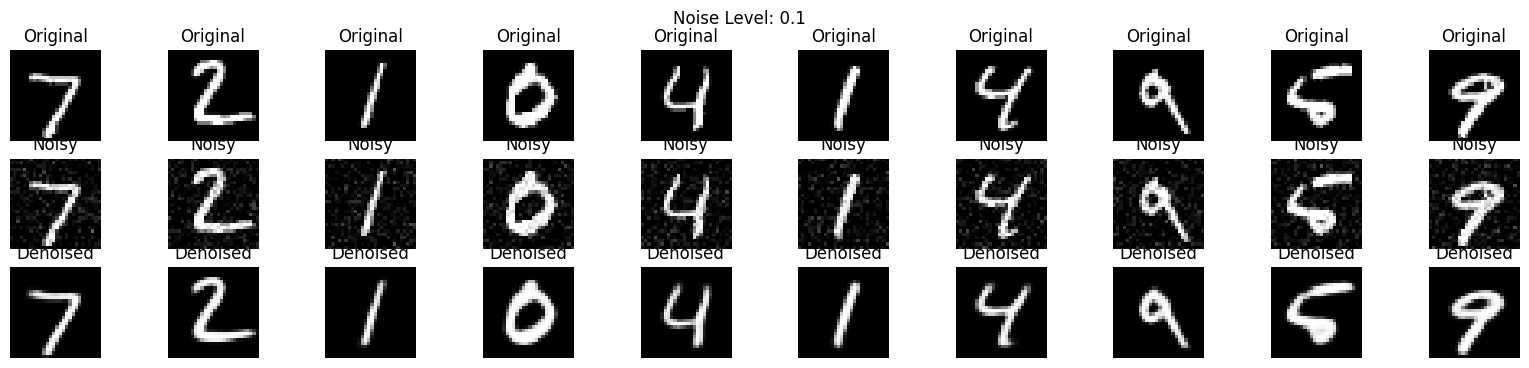

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


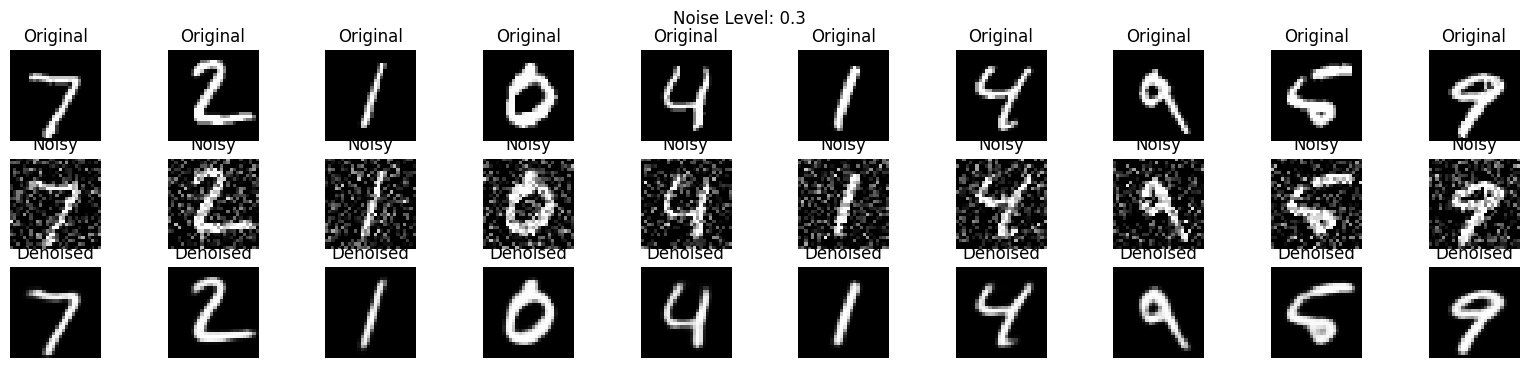

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


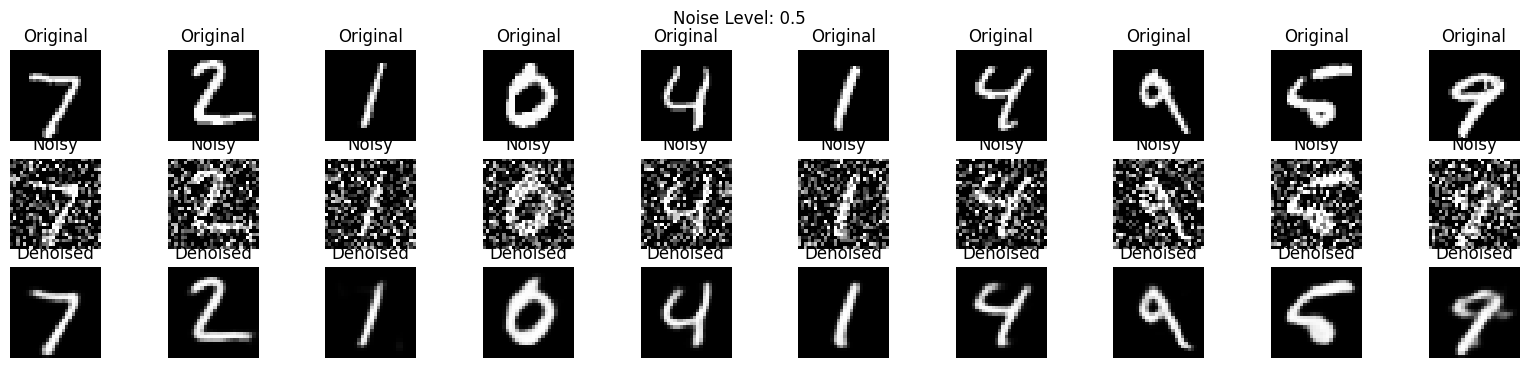

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


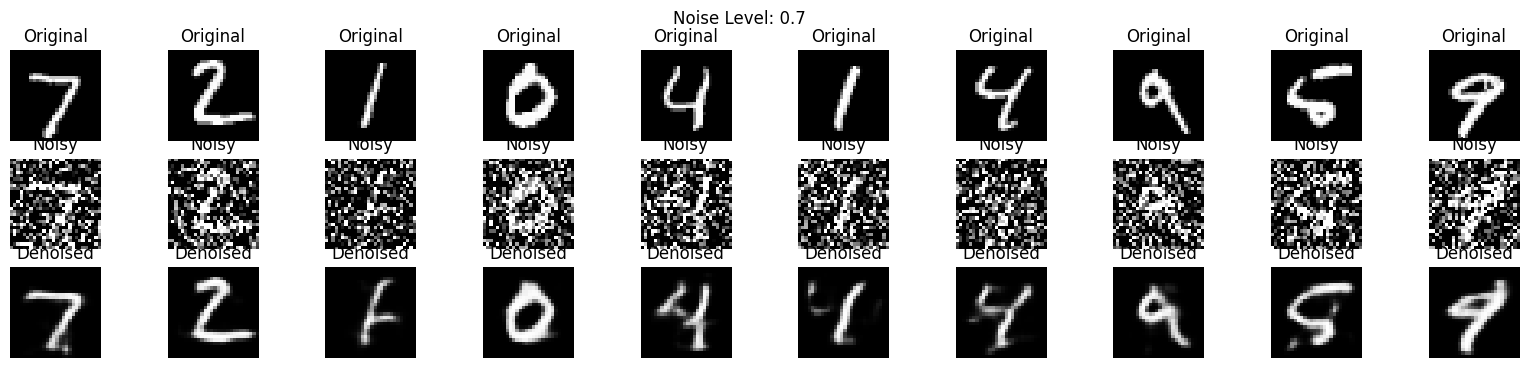

In [13]:
noise_levels = [0.1, 0.3, 0.5, 0.7]
evaluate_autoencoder(autoencoder, x_test, noise_levels)

Certainly! Let's break down the `evaluate_autoencoder` function step-by-step:

### Function Definition
```python
def evaluate_autoencoder(autoencoder, x_test, noise_levels):
```
- **`autoencoder`**: The trained autoencoder model.
- **`x_test`**: The test dataset of images.
- **`noise_levels`**: A list of noise levels to evaluate the autoencoder on.

### Loop Over Noise Levels
```python
for noise_level in noise_levels:
    x_test_noisy = add_noise(x_test, noise_level)
    decoded_imgs = autoencoder.predict(x_test_noisy)
```
- **`for noise_level in noise_levels`**: Iterate over each noise level in the list.
- **`add_noise(x_test, noise_level)`**: Add the specified level of Gaussian noise to the test images.
- **`autoencoder.predict(x_test_noisy)`**: Use the autoencoder to predict (denoise) the noisy images.

### Visualization Setup
```python
n = 10
plt.figure(figsize=(20, 4))
```
- **`n = 10`**: Number of images to display.
- **`plt.figure(figsize=(20, 4))`**: Create a new figure for the plots, with a specified size.

### Display Images
```python
for i in range(n):
    # Display original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # Display noisy
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap='gray')
    plt.title("Noisy")
    plt.axis('off')

    # Display denoised
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.title("Denoised")
    plt.axis('off')
```
- **`for i in range(n)`**: Loop over the first `n` images in the test set.
- **Display Original Images**:
  ```python
  ax = plt.subplot(3, n, i + 1)
  plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
  plt.title("Original")
  plt.axis('off')
  ```
  - **`plt.subplot(3, n, i + 1)`**: Create a subplot in the first row for the original image.
  - **`plt.imshow(x_test[i].reshape(28, 28), cmap='gray')`**: Display the original image.
  - **`plt.title("Original")`**: Set the title of the subplot to "Original".
  - **`plt.axis('off')`**: Hide the axes.

- **Display Noisy Images**:
  ```python
  ax = plt.subplot(3, n, i + 1 + n)
  plt.imshow(x_test_noisy[i].reshape(28, 28), cmap='gray')
  plt.title("Noisy")
  plt.axis('off')
  ```
  - **`plt.subplot(3, n, i + 1 + n)`**: Create a subplot in the second row for the noisy image.
  - **`plt.imshow(x_test_noisy[i].reshape(28, 28), cmap='gray')`**: Display the noisy image.
  - **`plt.title("Noisy")`**: Set the title of the subplot to "Noisy".
  - **`plt.axis('off')`**: Hide the axes.

- **Display Denoised Images**:
  ```python
  ax = plt.subplot(3, n, i + 1 + 2*n)
  plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
  plt.title("Denoised")
  plt.axis('off')
  ```
  - **`plt.subplot(3, n, i + 1 + 2*n)`**: Create a subplot in the third row for the denoised image.
  - **`plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')`**: Display the denoised image.
  - **`plt.title("Denoised")`**: Set the title of the subplot to "Denoised".
  - **`plt.axis('off')`**: Hide the axes.

### Add Title and Show Plot
```python
plt.suptitle(f"Noise Level: {noise_level}")
plt.show()
```
- **`plt.suptitle(f"Noise Level: {noise_level}")`**: Set a super title for the entire figure indicating the noise level.
- **`plt.show()`**: Display the figure with all the subplots.

### Summary
- **Add Noise**: Adds different levels of Gaussian noise to the test images.
- **Predict**: Uses the autoencoder to denoise the images.
- **Visualize**: Displays the original, noisy, and denoised images side by side for comparison. This helps to visually evaluate the effectiveness of the autoencoder at different noise levels.